# LHC Luminosity
<hr style="border-top-width: 4px; border-top-color: #34609b;">
Extract live data from the [LHC](http://home.cern/topics/large-hadron-collider) and create interactive plots with [pytimber](https://github.com/rdemaria/pytimber).

## Preparation

Let's import all the Python modules necessary for this study and tell matplotlib to generate interactive javascript plots.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import time
import pytimber

We now open the connection to the database:

In [2]:
db = pytimber.LoggingDB()

## Retrieve the data from the logging database
We are now ready to open a connection to the logging database with [pytimber](https://github.com/rdemaria/pytimber) and extract the luminosity for the past 24 hours.

In [3]:
now=time.time()
now_minus_a_day = now - 3600*24
alice='ALICE:LUMI_TOT_INST'
atlas='ATLAS:LUMI_TOT_INST'
cms='CMS:LUMI_TOT_INST'
lhcb='LHCB:LUMI_TOT_INST'
data=db.get([alice,atlas,cms,lhcb],now_minus_a_day,now)

## Plotting the data

We can now build a plot of the intensity and beams energy starting from the data we retrieved. The [matplotlib](https://matplotlib.org) library can be used for creating interactive javascript based data visualisations.

<IPython.core.display.Javascript object>


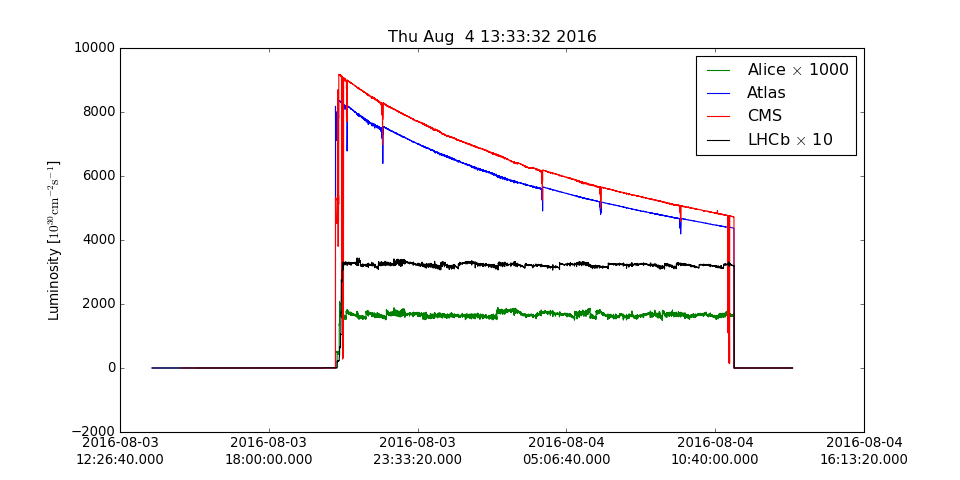

In [4]:
#Create figure
plt.figure(figsize=(12,6))

#Plot Alice
tt,vv=data[alice]
plt.plot(tt,1000*vv,'-g',label=r'Alice $\times$ 1000')

#Plot Atlas
tt,vv=data[atlas]
plt.plot(tt,vv,'-b',label='Atlas')

#Plot CMS
tt,vv=data[cms]
plt.plot(tt,vv,'-r',label='CMS')

#Plot LHCb
tt,vv=data[lhcb]
plt.plot(tt,10*vv,'-k',label=r'LHCb $\times$ 10')

#Set axis and legend
plt.ylabel(r'Luminosity [$10^{30} \rm cm^{-2}  s^{-1}$]')
plt.legend()
plt.title(time.asctime(time.localtime(now)))
pytimber.set_xaxis_date()